In [1]:
import pandas, seaborn, scipy, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'FreeSans', 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'figure.figsize':(12, 8)})

In [3]:
gold_file = 'gold.csv'
skyblue_file = 'skyblue.csv'

metadata_file = '/home/adrian/databases/gtex/GTEX_phenotype.tsv'

In [4]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

In [5]:
gold_df = pandas.read_csv(gold_file, index_col=0)
print(gold_df.shape)

skyblue_df = pandas.read_csv(skyblue_file, index_col=0)
print(skyblue_df.shape)

(2346, 4385)
(4252, 4385)


In [6]:
metadata = pandas.read_csv(metadata_file, sep='\t', index_col=0)

In [7]:
# join

In [8]:
frames = [gold_df, skyblue_df]
result = pandas.concat(frames)
print(result.shape)

(6598, 4385)


In [9]:
# 

In [10]:
subset = result.loc[[iso1, iso2], :]

In [11]:
subset


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000354449.7,-3.184409,0.364421,-1.403553,0.298591,0.633081,-0.140977,0.606997,0.226263,0.295672,1.194365,...,0.079223,-0.910887,0.53685,0.492280,-0.115982,-0.815245,-1.080979,1.255227,-1.307412,1.752759
ENST00000354956.9,1.265877,0.719010,-1.056392,-0.682643,-1.142360,1.029533,1.076049,-0.996015,0.476427,-0.828226,...,-0.874937,-0.799387,-1.14236,0.477387,-0.869514,0.683068,-0.884292,0.111030,-0.370963,1.119077


In [12]:
# dealing with appropiate tissue names

tissues = []
for ID in result.columns:
    tissue = metadata.loc[ID]['_primary_site']
    tissues.append(tissue)

unique_tissues = list(set(tissues))
print(len(unique_tissues), unique_tissues)

small_sample_tissues = []
for tissue in unique_tissues:
    k = tissues.count(tissue)
    if k < 20:
        print(tissue, k)
        small_sample_tissues.append(tissue)
    else:
        print('\t', tissue, k)
        
for i in range(len(tissues)):
    if tissues[i] in small_sample_tissues:
        tissues[i] = 'other'

unique_tissues = list(set(tissues))
unique_tissues.sort()
print(len(unique_tissues), unique_tissues)

32 ['Kidney', 'Muscle', 'Ovary', 'Adrenal Gland', 'Fallopian Tube', 'Bladder', 'Blood', 'Heart', 'Uterus', 'Thyroid', 'Blood Vessel', 'Small Intestine', '<not provided>', 'Spleen', 'Stomach', 'Breast', 'Bone Marrow', 'Prostate', 'Brain', 'Esophagus', 'Lung', 'Adipose Tissue', 'Colon', 'Pituitary', 'Nerve', 'Vagina', 'Pancreas', 'Testis', 'Skin', 'Liver', 'Salivary Gland', 'Cervix Uteri']
Kidney 9
Muscle 6
	 Ovary 86
	 Adrenal Gland 52
Fallopian Tube 5
Bladder 9
	 Blood 78
Heart 14
	 Uterus 71
	 Thyroid 258
	 Blood Vessel 496
	 Small Intestine 76
<not provided> 2
	 Spleen 91
	 Stomach 55
	 Breast 159
Bone Marrow 11
	 Prostate 94
	 Brain 260
	 Esophagus 411
	 Lung 277
	 Adipose Tissue 421
	 Colon 223
	 Pituitary 104
	 Nerve 259
	 Vagina 77
Pancreas 6
	 Testis 161
	 Skin 559
Liver 3
	 Salivary Gland 42
Cervix Uteri 10
23 ['Adipose Tissue', 'Adrenal Gland', 'Blood', 'Blood Vessel', 'Brain', 'Breast', 'Colon', 'Esophagus', 'Lung', 'Nerve', 'Ovary', 'Pituitary', 'Prostate', 'Salivary Gland',

Adipose Tissue
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 0.004580850045452257
diff: 0.22376961478172086
n: 421


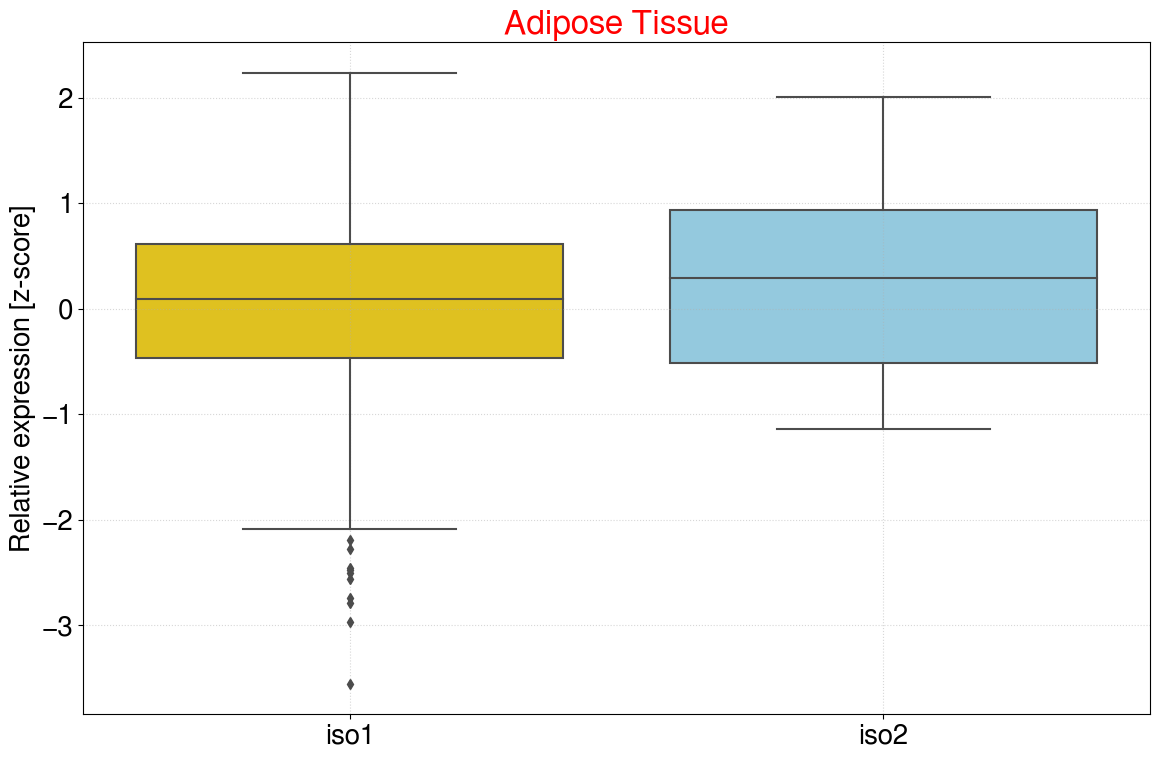


Adrenal Gland
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 4.496425228374002
diff: -0.19362773222054805
n: 52


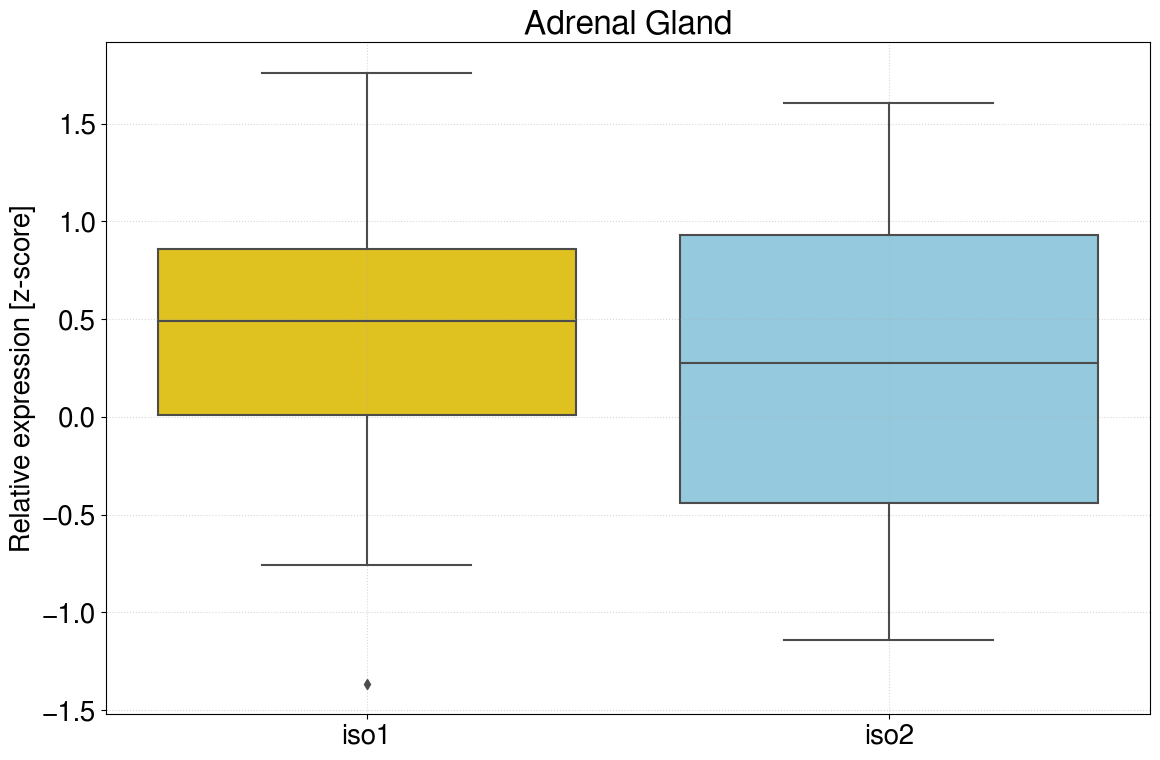


Blood
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 9.411032994843103e-88
diff: 3.870195535279003
n: 78


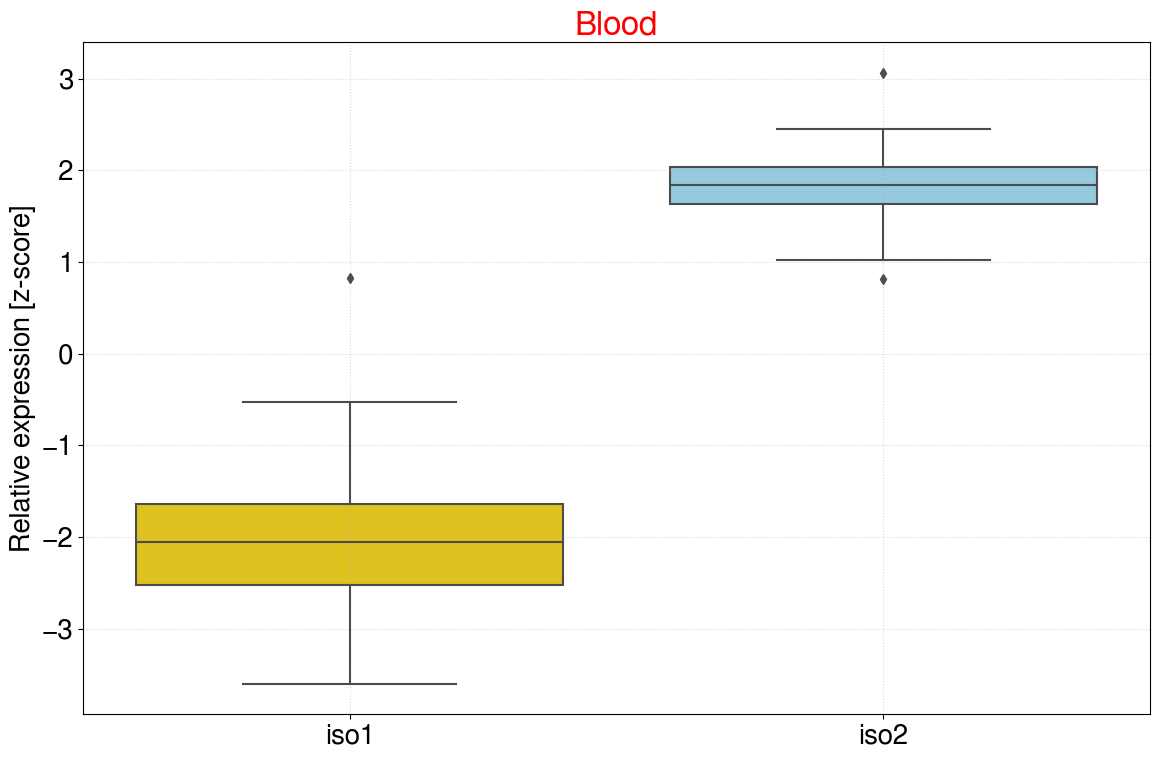


Blood Vessel
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 8.747414101351144e-45
diff: -0.703222790245913
n: 496


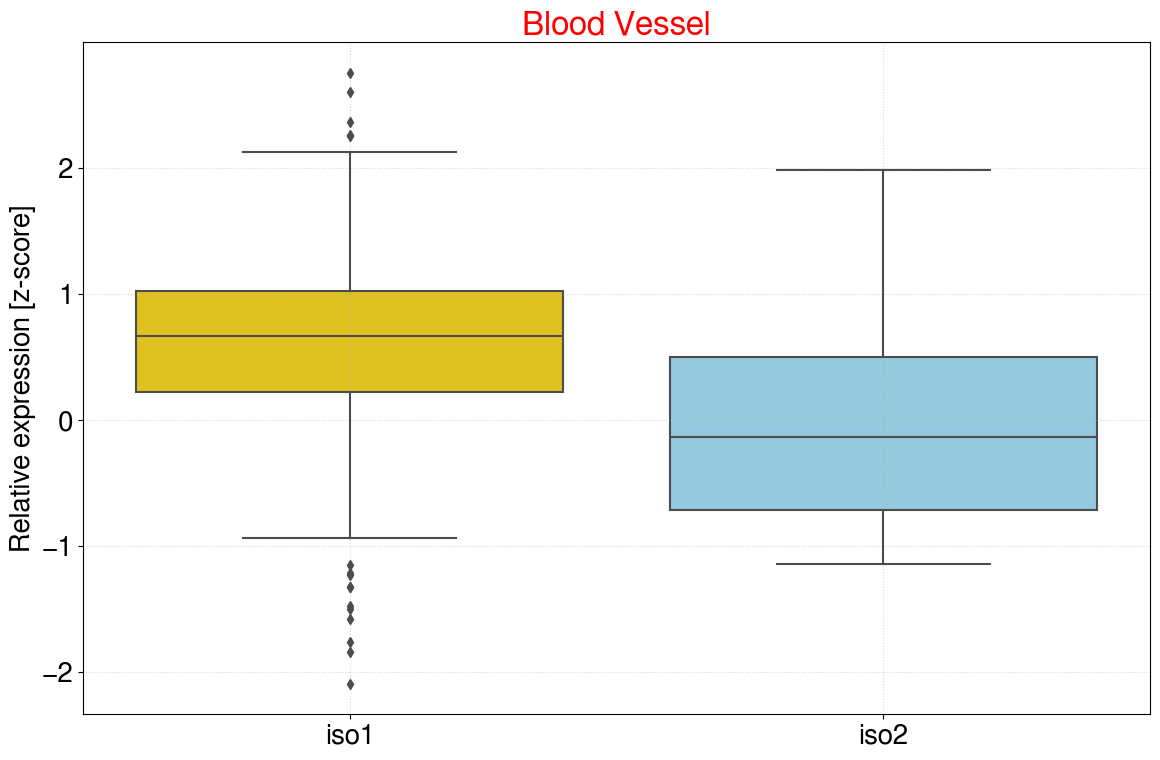


Brain
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 5.985970475863033
diff: -0.09262781663640574
n: 260


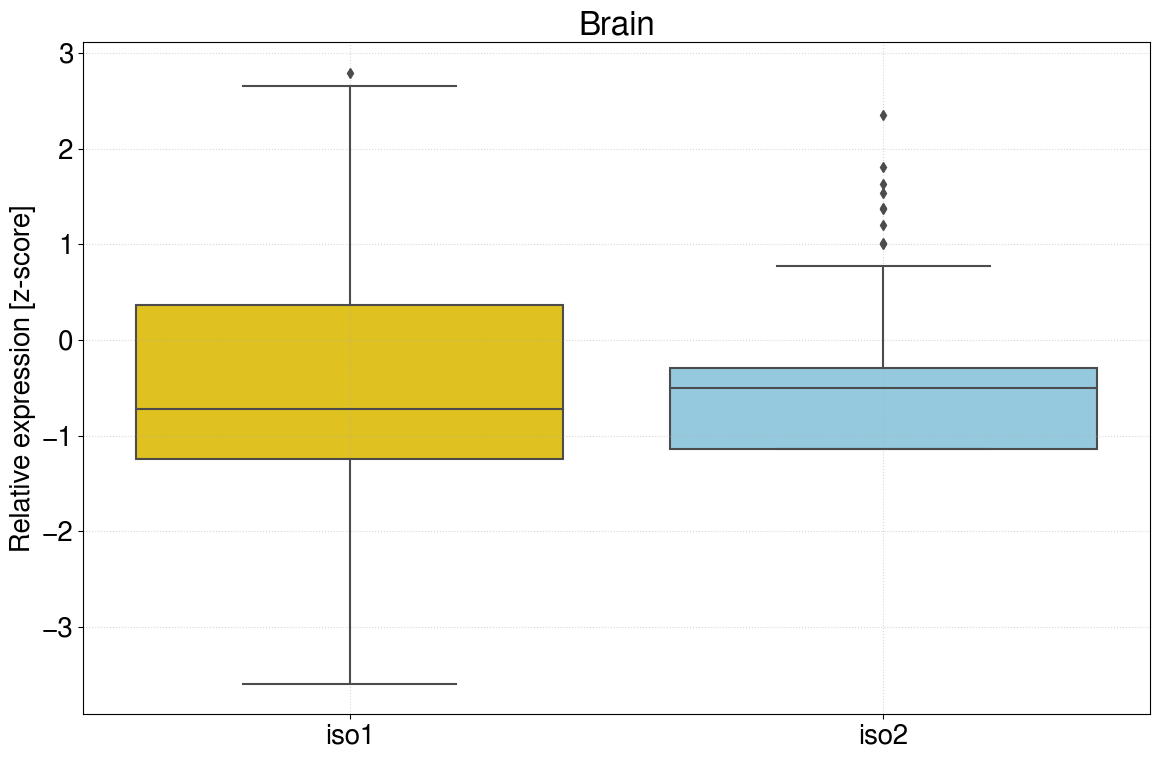


Breast
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 12.734154952976517
diff: 0.04516013229351733
n: 159


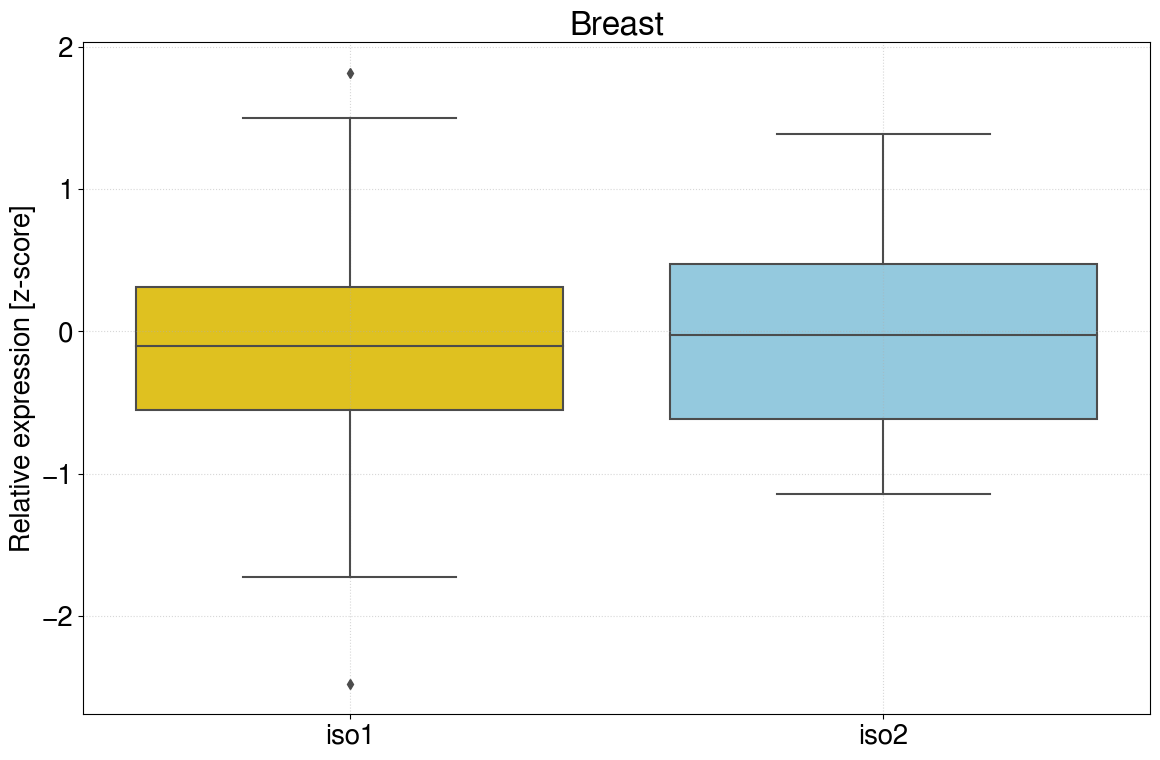


Colon
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 21.644271033208497
diff: -0.005187492498409552
n: 223


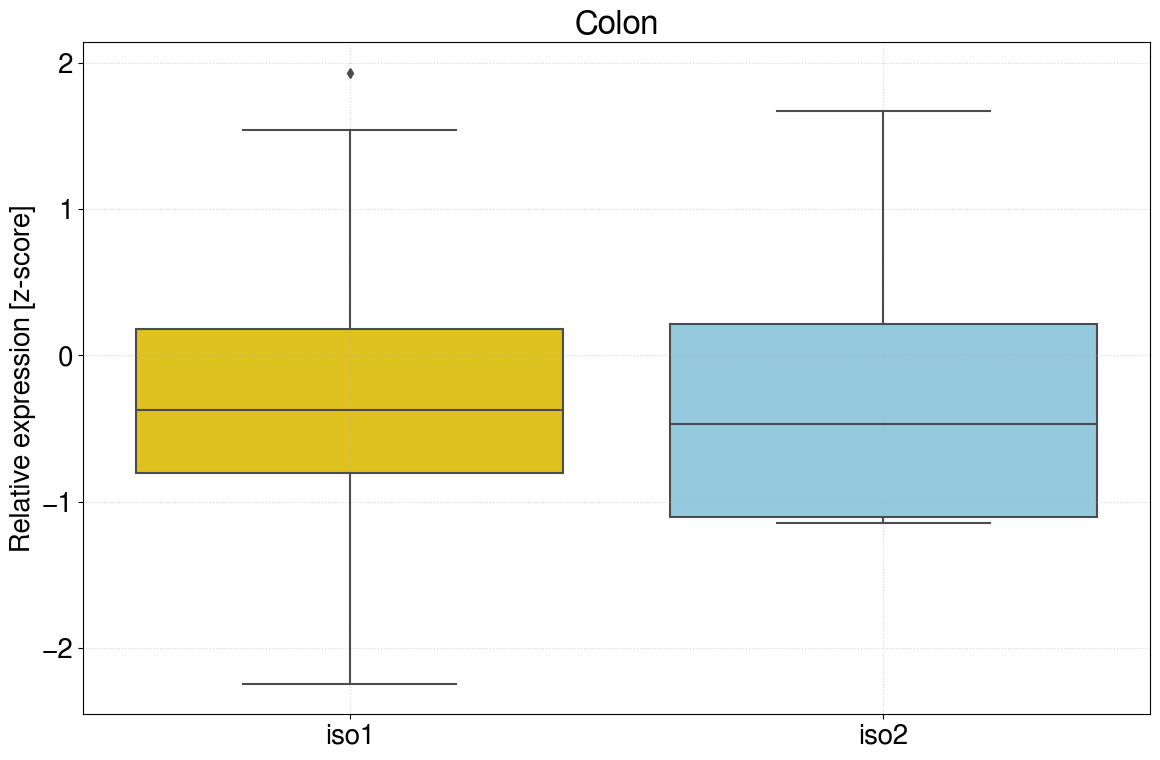


Esophagus
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 1.007419017180283
diff: 0.1158488821963039
n: 411


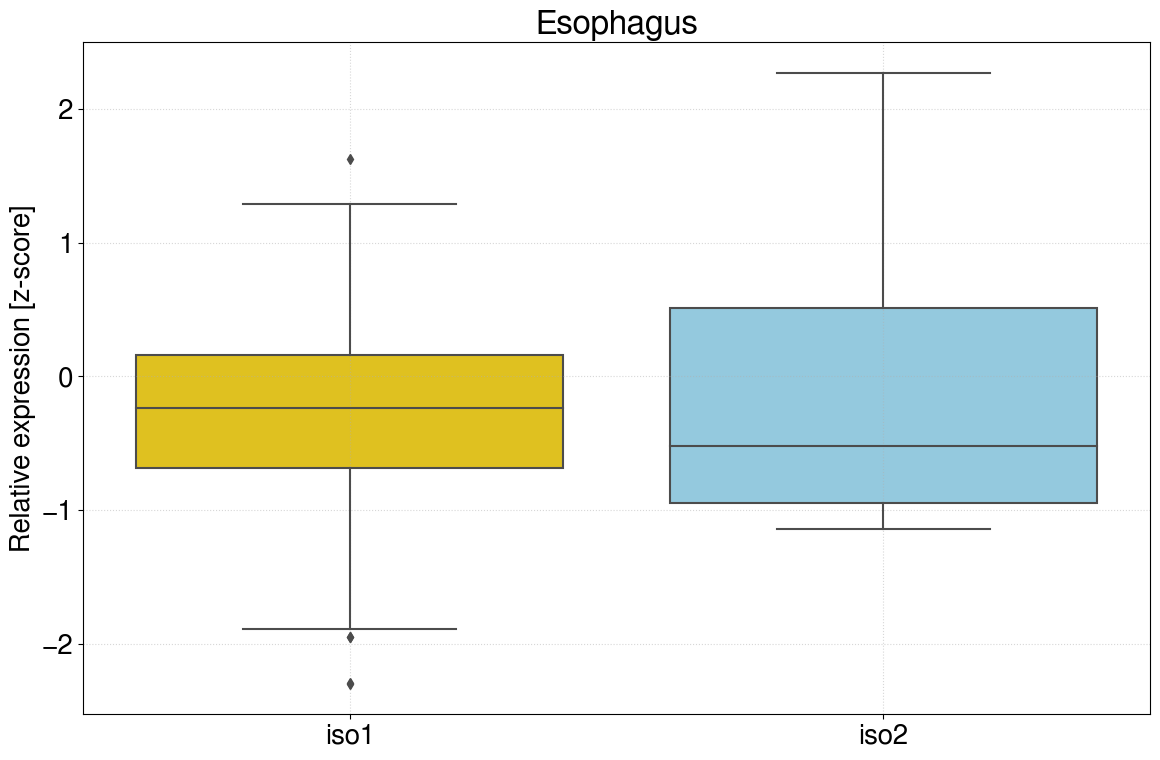


Lung
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 4.969431428105313e-07
diff: 0.4340494461290685
n: 277


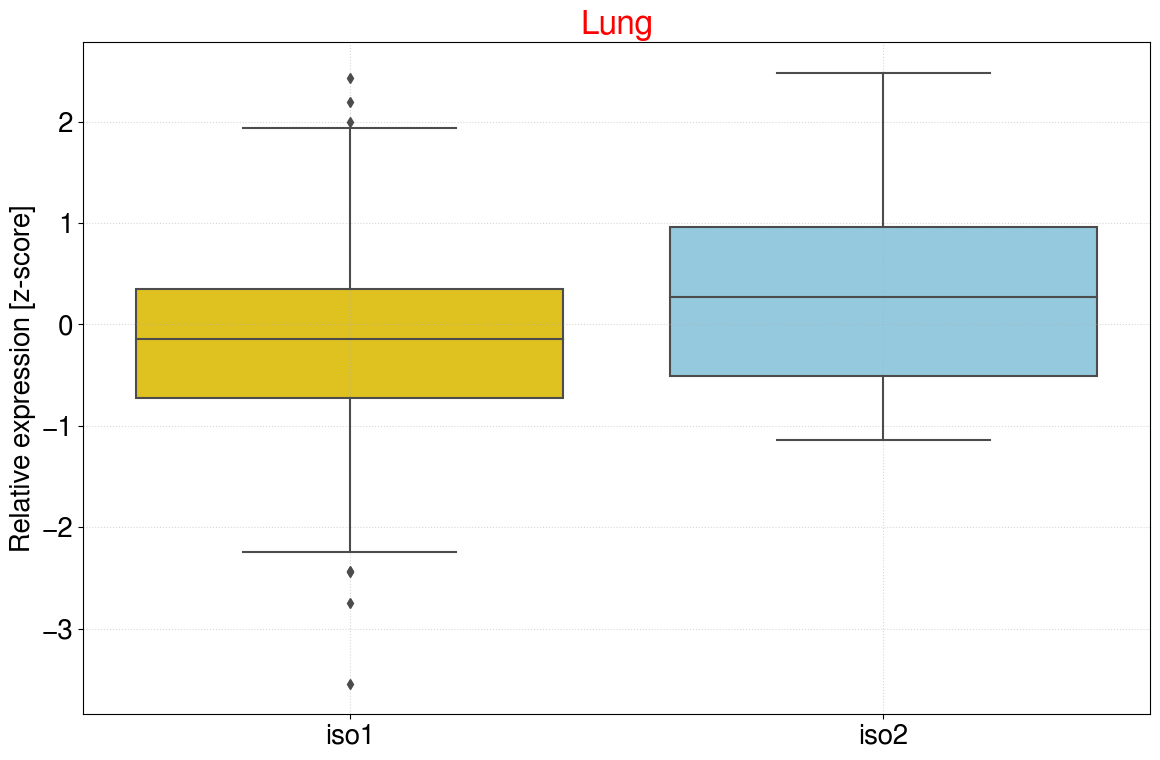


Nerve
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 2.8871293348915624e-120
diff: -1.563235458648421
n: 259


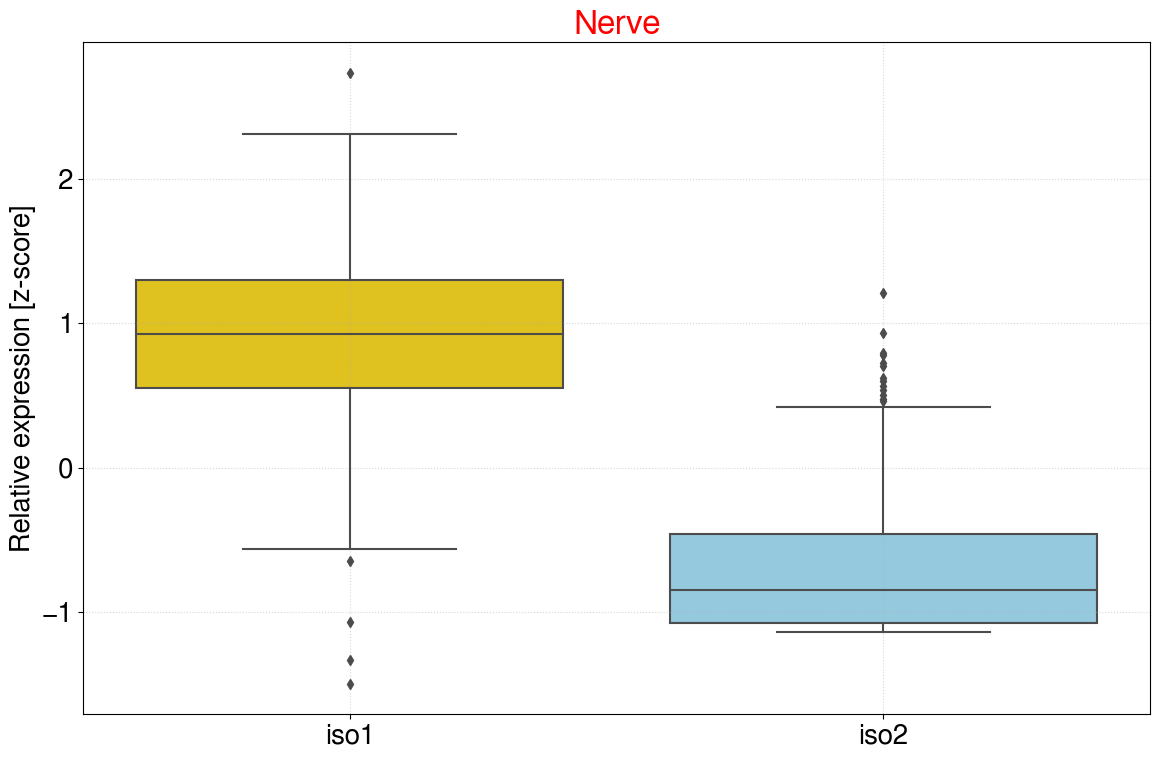


Ovary
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 6.743334689999571e-12
diff: -0.6842962913725299
n: 86


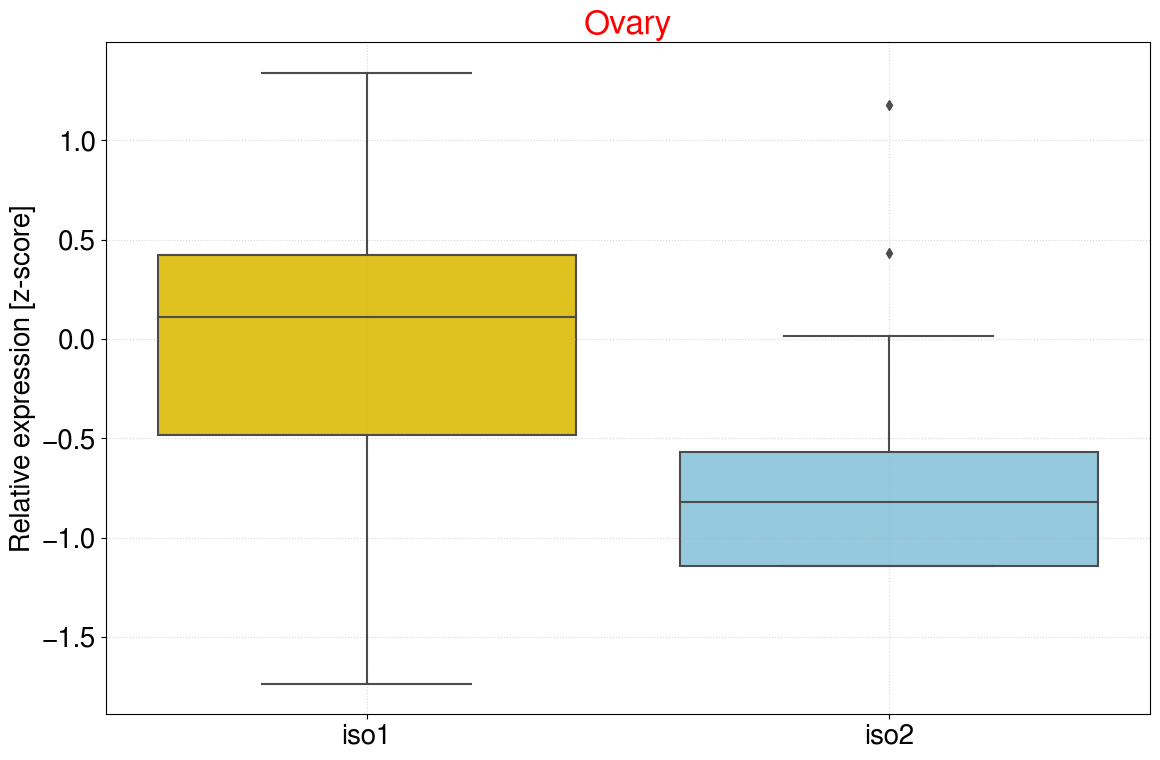


Pituitary
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 3.057209567392495e-05
diff: 0.38492714184477117
n: 104


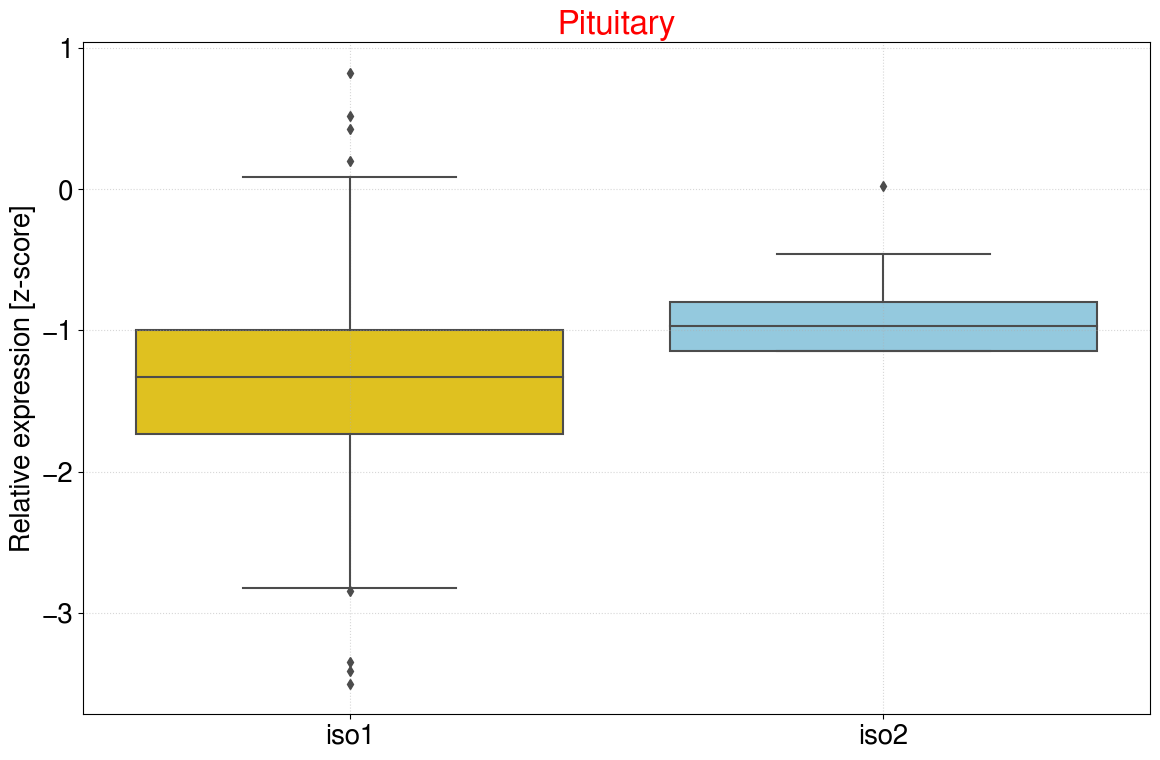


Prostate
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 5.721148667322649e-12
diff: -0.5885681093162219
n: 94


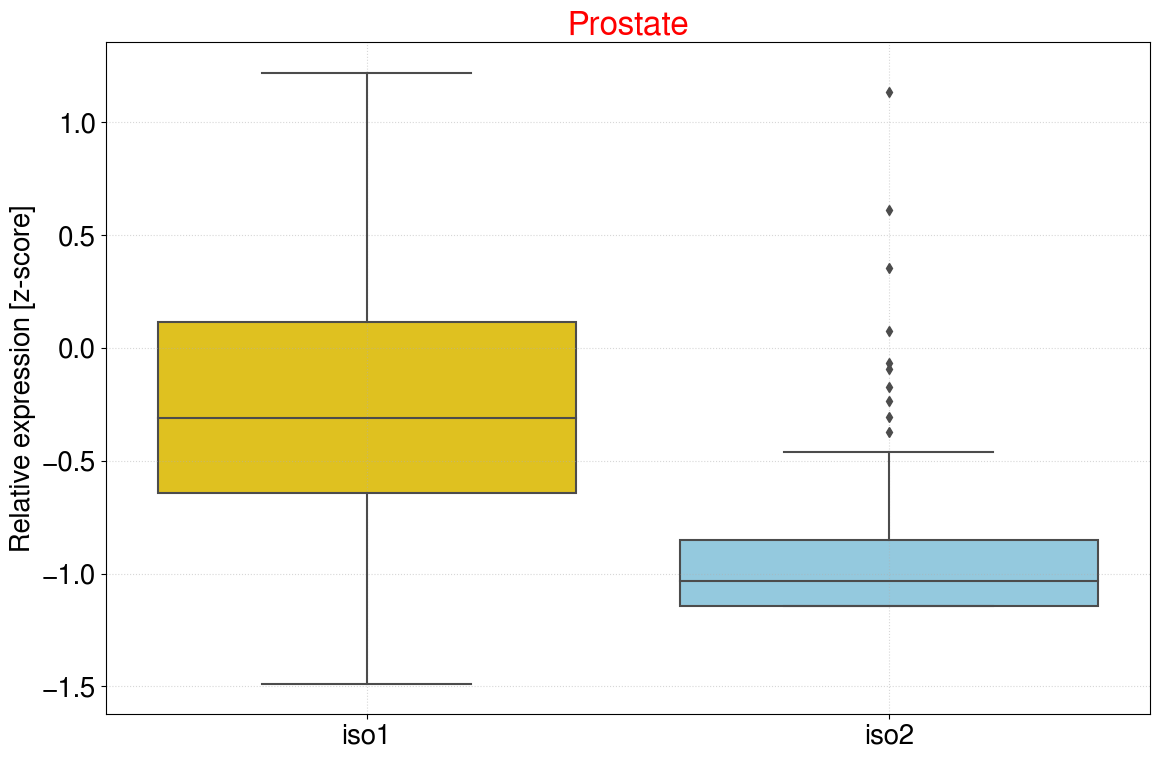


Salivary Gland
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 0.0005341429960212407
diff: 0.7450908770855253
n: 42


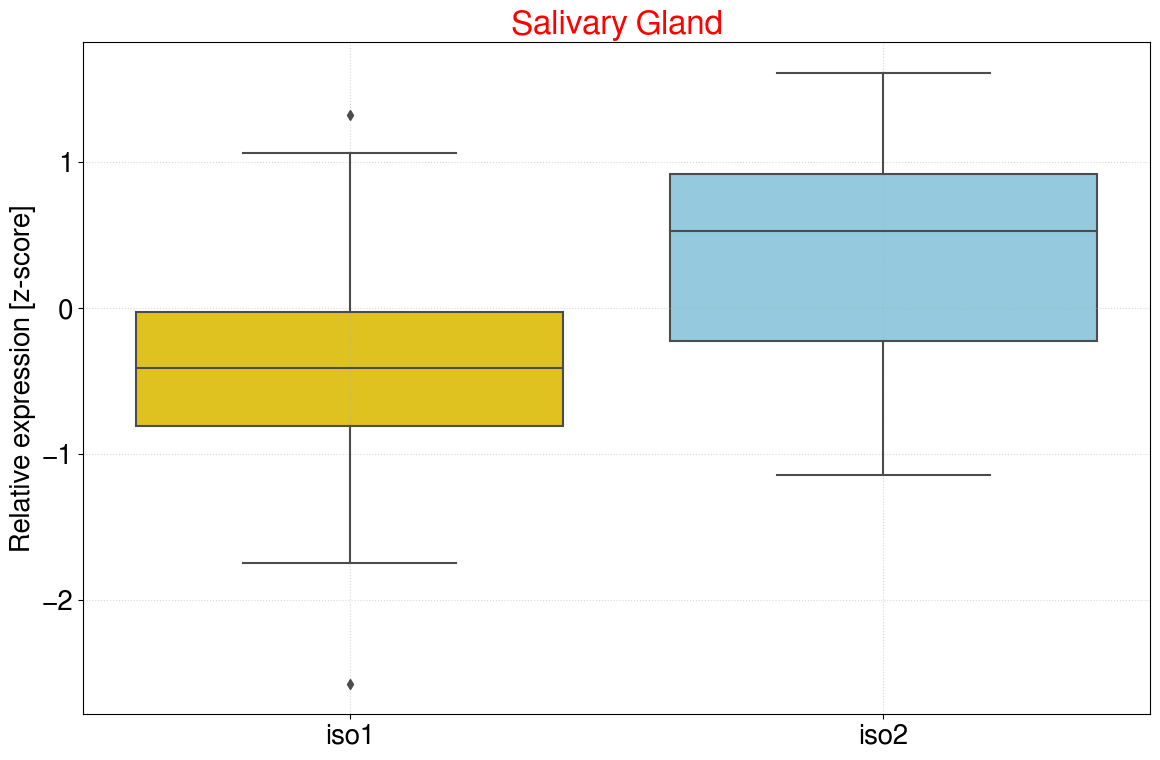


Skin
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 1.221383149793797e-13
diff: 0.4429856193313786
n: 559


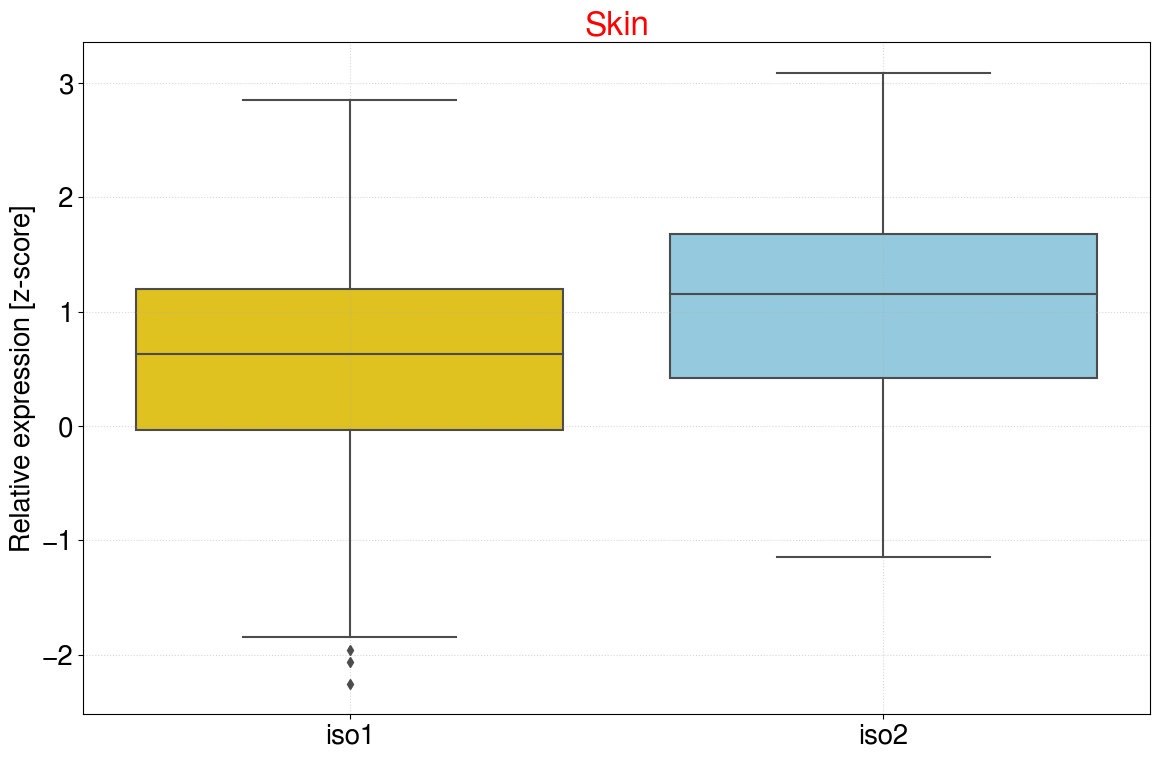


Small Intestine
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 0.004145549433542024
diff: 0.3955613355701412
n: 76


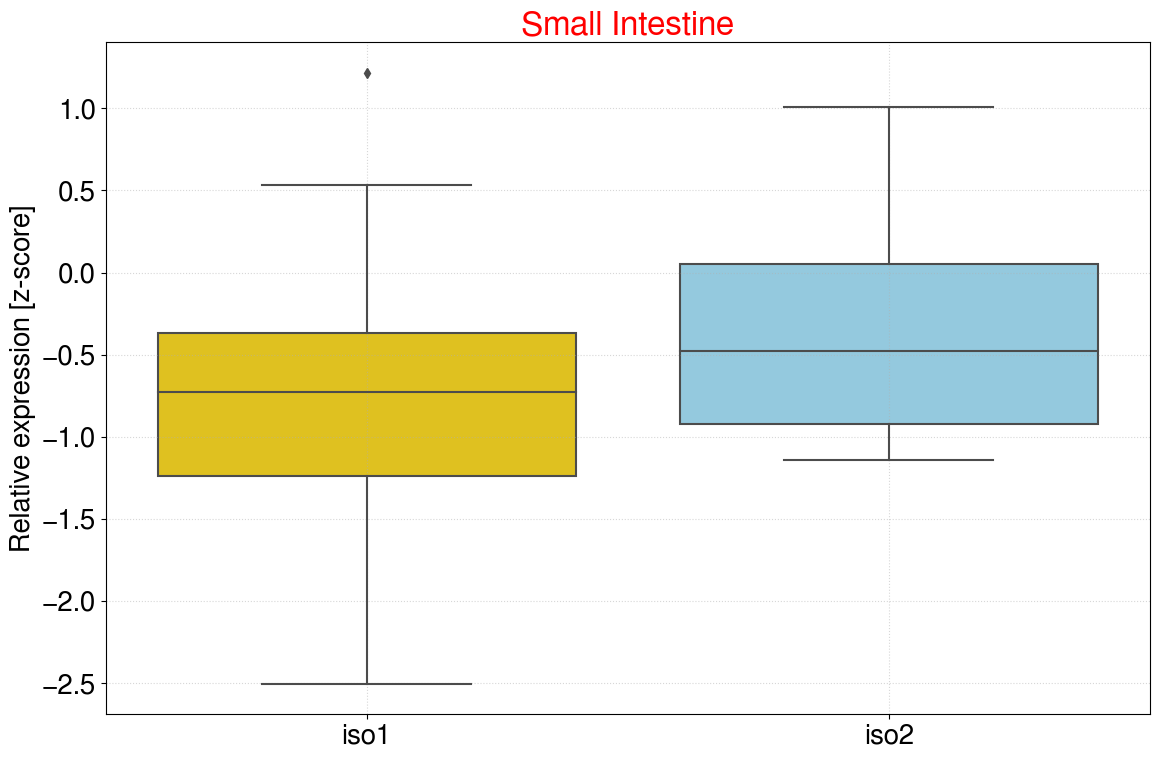


Spleen
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 3.211814069346672e-11
diff: -0.7112763878022075
n: 91


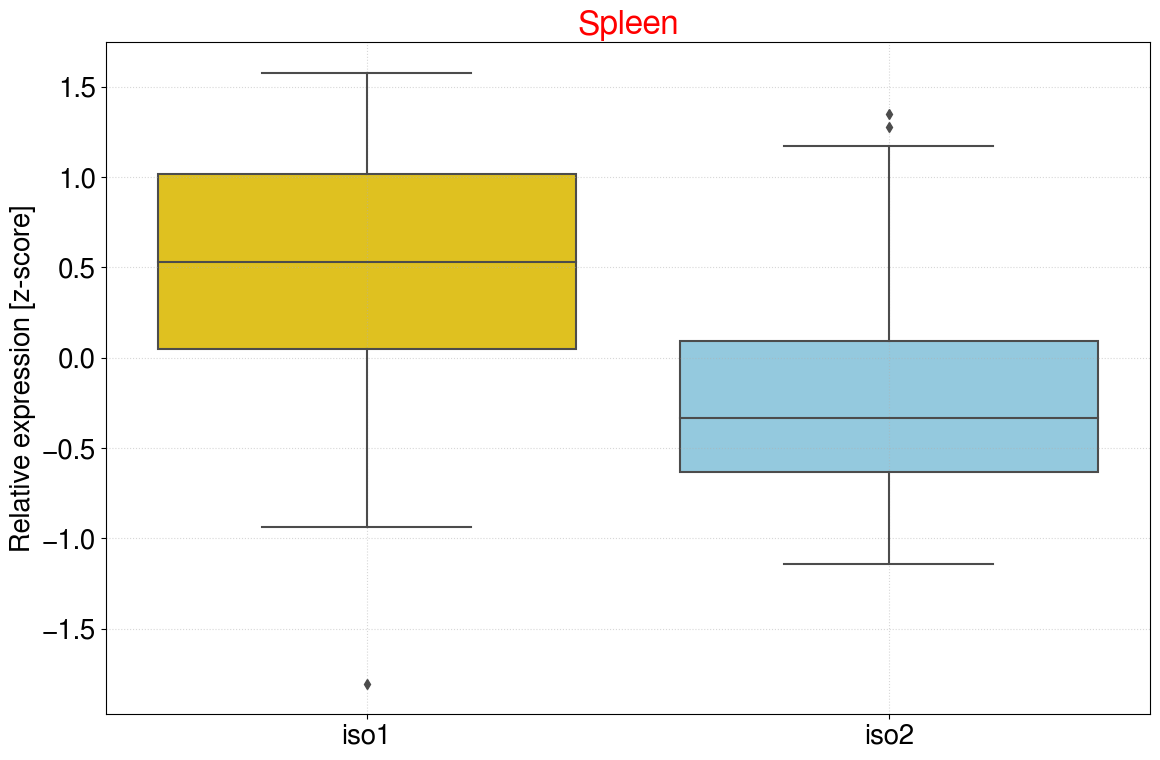


Stomach
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 2.4620151988986088
diff: 0.22608206806253112
n: 55


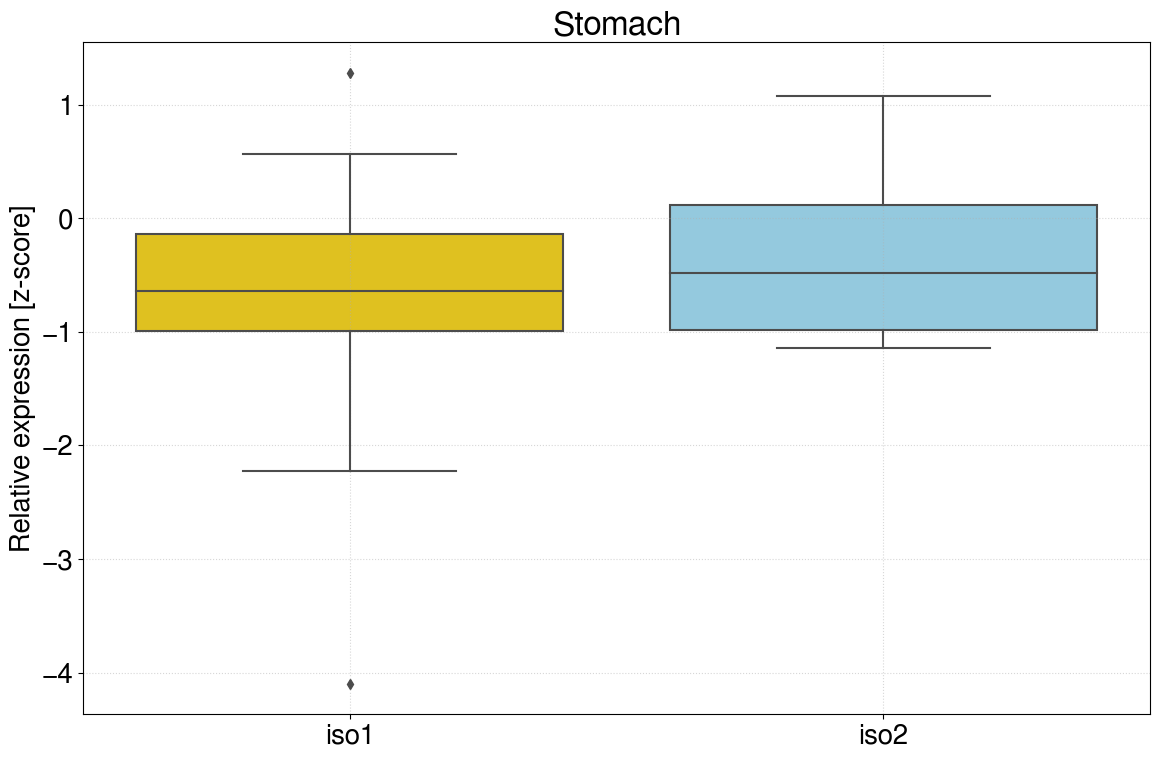


Testis
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 1.4097497171433546
diff: 0.19824547874869414
n: 161


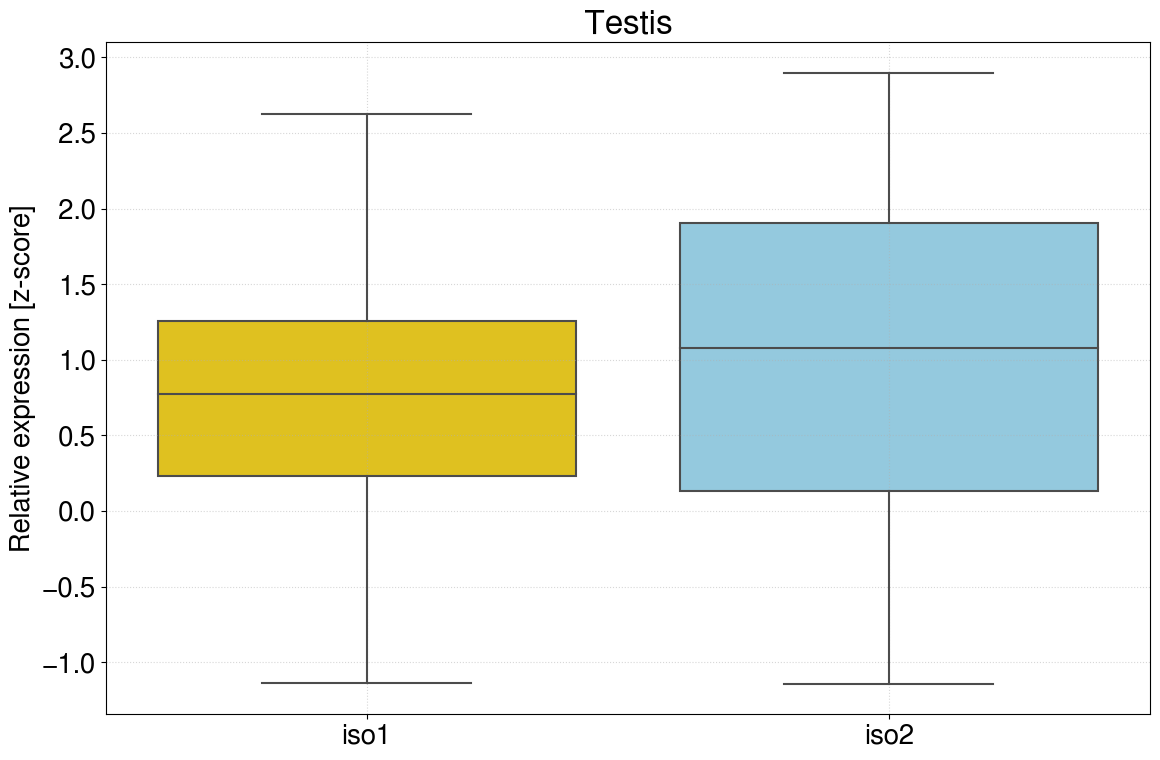


Thyroid
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 0.0008939476052386113
diff: -0.19271139760203038
n: 258


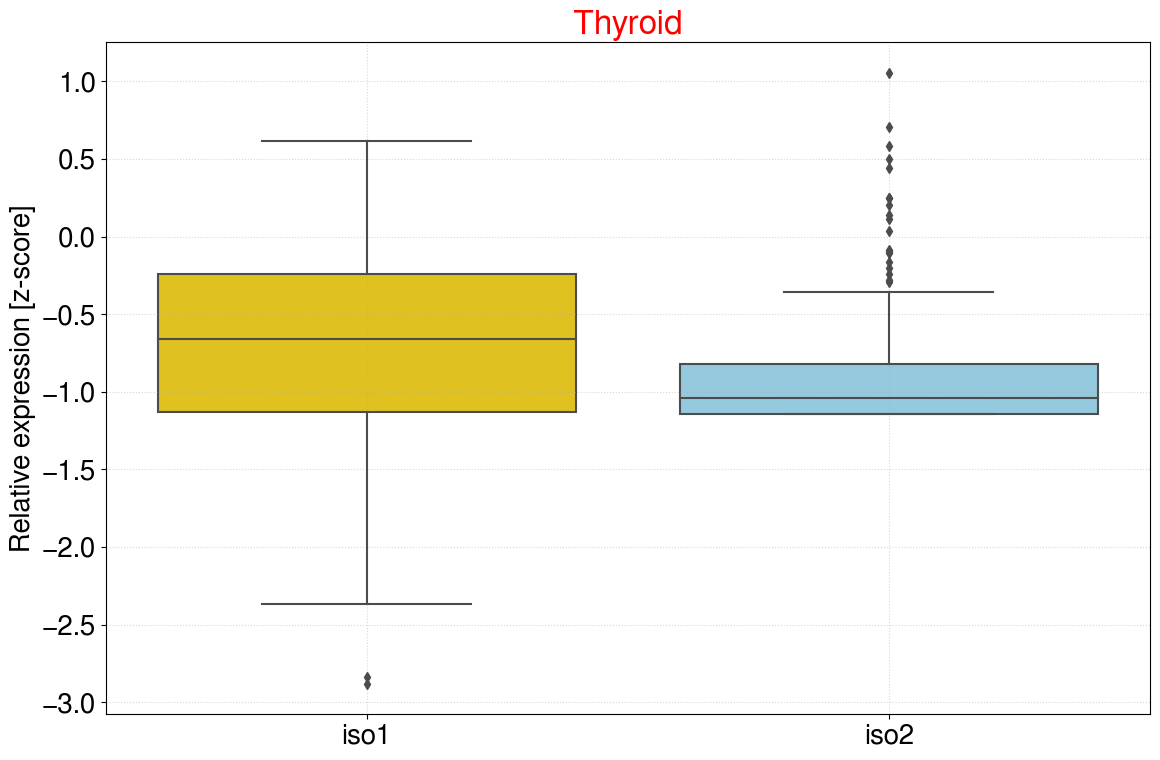


Uterus
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 1.4044875760724053e-06
diff: -0.6808434311254055
n: 71


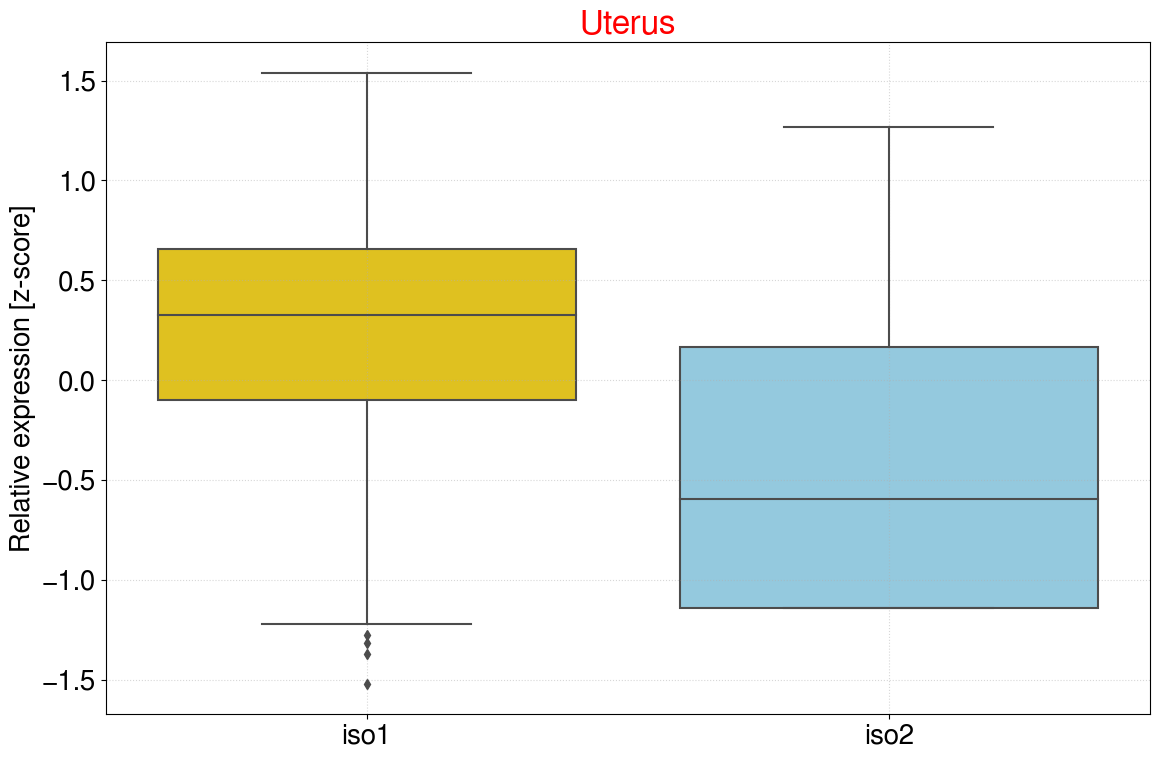


Vagina
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: 0.0044057249799227
diff: 0.5333698009921701
n: 77


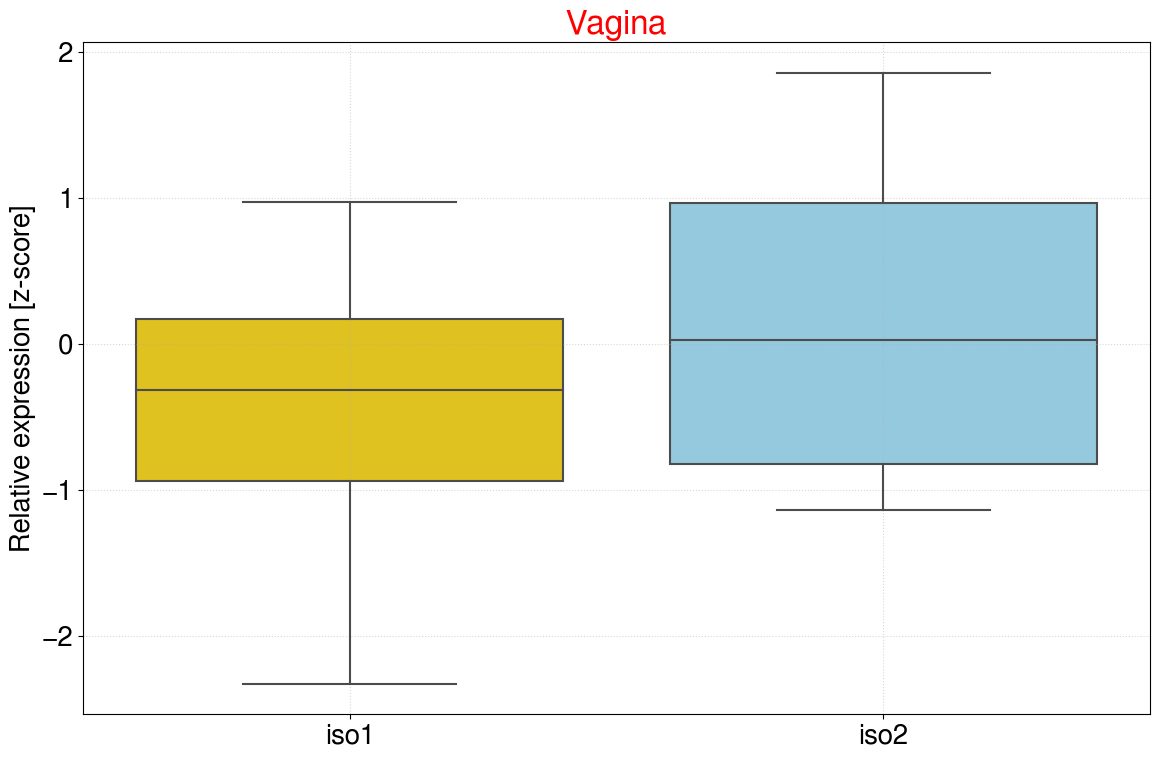


other
['GTEX-S4Q7-0003-SM-3NM8M', 'GTEX-QV31-1626-SM-2S1QC', 'GTEX-13OW5-0626-SM-5J2N2', 'GTEX-ZPCL-0126-SM-4WWC8', 'GTEX-X88G-0426-SM-47JZ5'] 4385
corrected P: nan
diff: nan
n: 0


/home/adrian/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/adrian/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


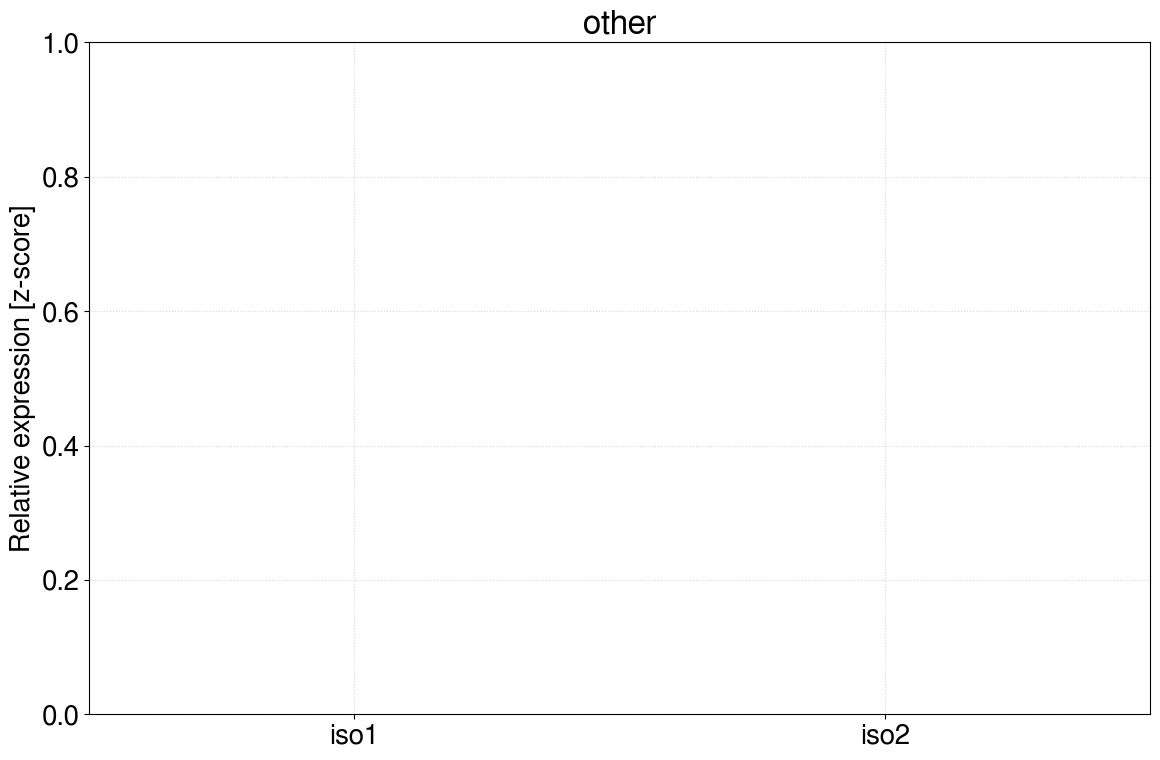

In [13]:
volcanox = []; volcanoy = []

for tissue in unique_tissues:
    print(tissue)
    
    # define sample IDs in expression set
    expressionIDs = subset.columns.to_list()
    print(expressionIDs[:5], len(expressionIDs))
    
    # define the sample IDs in metadata for that tissue
    metadata_slice = metadata[metadata['_primary_site'] == tissue].index.to_list()
    
    # intersect
    intersect = list(set(expressionIDs) & set(metadata_slice))
    
    exp1 = subset.loc[iso1, intersect].to_list()
    exp2 = subset.loc[iso2, intersect].to_list()
    
    boxes = [exp1, exp2]
    
    diff = numpy.mean(exp2) - numpy.mean(exp1)
    volcanox.append(diff)
    
    
    #
    # statistical test
    #
    stat, pvalue = scipy.stats.ttest_ind(boxes[0], boxes[1])
    correctedP = pvalue*len(unique_tissues)
    print('corrected P: {}'.format(correctedP))
    print('diff: {}'.format(diff))
    print('n: {}'.format(len(intersect)))
    volcanoy.append(-numpy.log10(correctedP))
    
    #
    # plot figure
    #
    mycolors = ['gold', 'skyblue']
    seaborn.boxplot(data=boxes, palette=mycolors)
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    if correctedP < 0.05:
        matplotlib.pyplot.title(tissue, color='red')
    else:
        matplotlib.pyplot.title(tissue, color='black')
    matplotlib.pyplot.ylabel('Relative expression [z-score]')
    matplotlib.pyplot.xticks([0, 1], ['iso1', 'iso2'])
    
    matplotlib.pyplot.tight_layout()
    
    matplotlib.pyplot.show()
    #matplotlib.pyplot.savefig('{}.svg'.format(tissue))
    #matplotlib.pyplot.clf()
    
    print()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


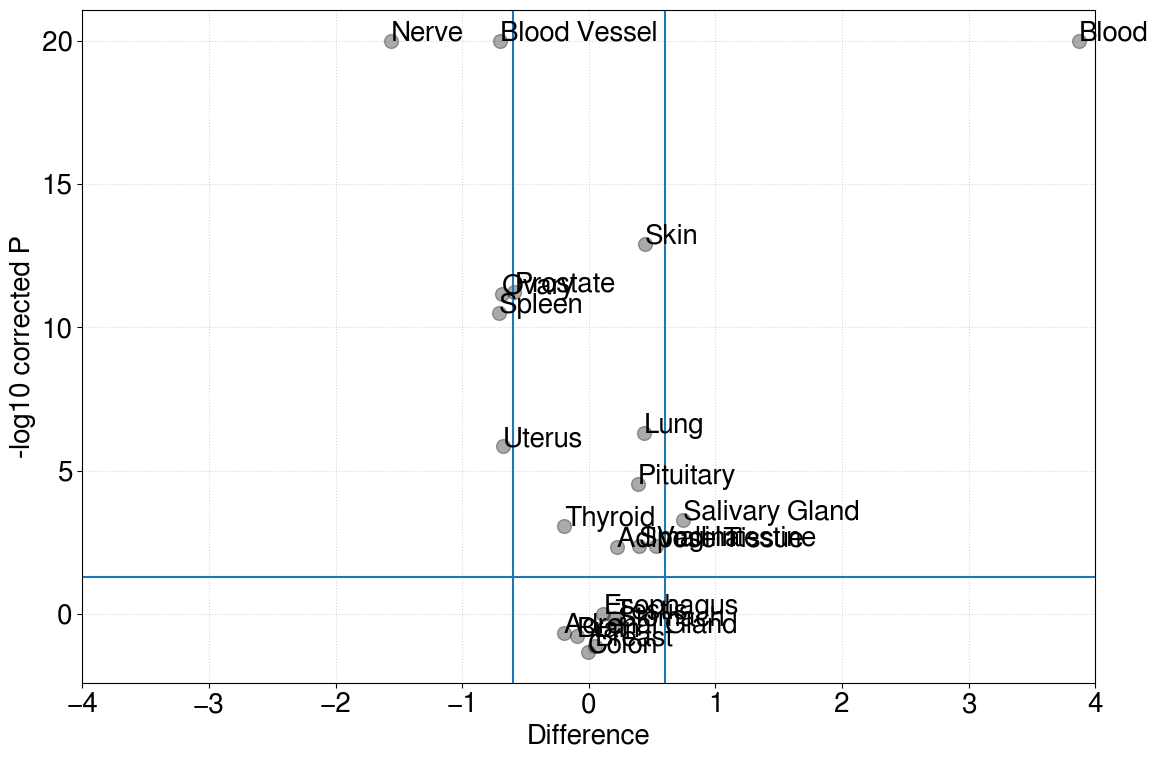

In [15]:
volcanoy = [20 if element > 20 else element for element in volcanoy]

matplotlib.pyplot.plot(volcanox, volcanoy, 'ok', alpha=1/3, markersize=10)
for i in range(len(unique_tissues)):
    matplotlib.pyplot.text(volcanox[i], volcanoy[i], unique_tissues[i], fontsize=20)

matplotlib.pyplot.axhline(y=-numpy.log10(0.05))
matplotlib.pyplot.axvline(x=-0.6)
matplotlib.pyplot.axvline(x=0.6)


matplotlib.pyplot.xlim([-4, 4])

matplotlib.pyplot.xlabel('Difference')
matplotlib.pyplot.ylabel('-log10 corrected P')

matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('last.png')